## Contours


### Data


This example uses a data for Abell1664 created by merging 6 separate observations together.

```bash
download_chandra_obsid 1648,17172,17173,17557,17568,7901 
merge_obs infiles="1648,17172,17173,17557,17568,7901" outroot="a1664" bin=1 psfecf=0.9
dmcopy "a1664_broad_thresh.img[(x,y)=box(4117.7639,4017.2639,902.47226,769.1639,0)]" \
    "a1664_broad_thresh_crop.img"
celldetect a1664_broad_thresh_crop.img cell.src fixedcell=6
dmcopy "cell.src[exclude (x,y)=circle(4120,4010,25)]" ciao_reg.fits 
roi ciao_reg.fits out=%02d_reg.fits group=individual targetbkg=target mode=h clob+
/bin/ls ??_reg.fits | sed 's,.*,region(&),' > src.lis
/bin/ls ??_reg.fits | sed 's,.*,region(&[bkgreg]),' > bkg.lis
dmfilth infile="a1664_broad_thresh_crop.img" outfile="a1664_broad_thresh_crop_fill.img" \
    method="POISSON" srclist="@src.lis" bkglist="@bkg.lis"
```


In [1]:
cd Contour;
ds9 a1664_broad_thresh_crop_fill.img  \
  -cmap load $ASCDS_INSTALL/contrib/data/heart.lut \
  -scale asinh -smooth yes &


[1] 28292


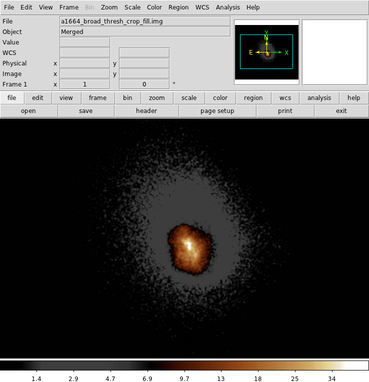

In [2]:
import -window "SAOImage ds9" -resize 50% ds9_09_contour_01.png
display < ds9_09_contour_01.png

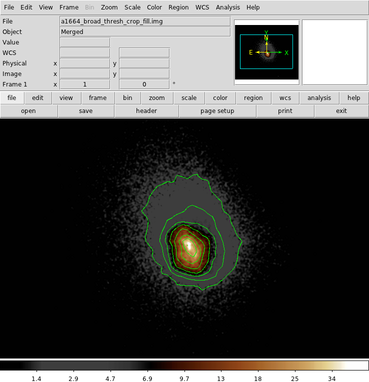

In [3]:
xpaset -p ds9 contour yes
xpaset -p ds9 contour nlevels 10
xpaset -p ds9 contour scale asinh
xpaset -p ds9 contour smooth 10
xpaset -p ds9 contour generate

#Move Contour dialog 
sleep 5

import -window "SAOImage ds9" -resize 50% ds9_09_contour_02.png
display < ds9_09_contour_02.png

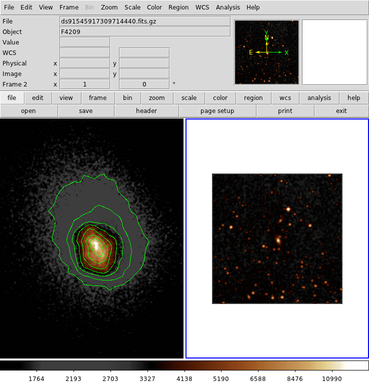

In [4]:
xpaset -p ds9 dsssao open
xpaset -p ds9 dsssao frame new
xpaset -p ds9 dsssao update frame

# move DSS window
sleep 5

import -window "SAOImage ds9" -resize 50% ds9_09_contour_03.png
display < ds9_09_contour_03.png

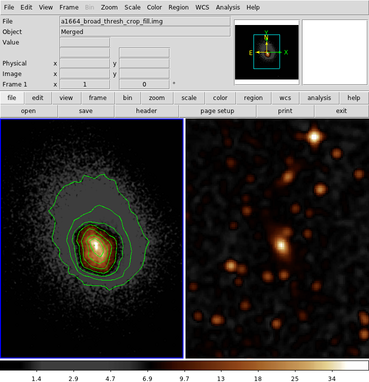

In [5]:
xpaset -p ds9 frame 1
xpaset -p ds9 match frame wcs

import -window "SAOImage ds9" -resize 50% ds9_09_contour_04.png
display < ds9_09_contour_04.png

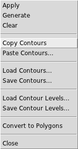

In [6]:
# grab contour File menu
sleep 3
import -window "File" -resize 50% ds9_09_contour_05.png
display < ds9_09_contour_05.png


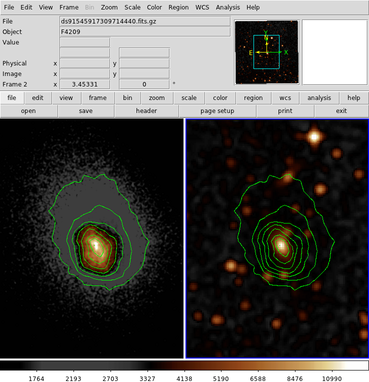

In [7]:
xpaset -p ds9 contour copy
xpaset -p ds9 frame 2
xpaset -p ds9 contour paste 

import -window "SAOImage ds9" -resize 50% ds9_09_contour_06.png
display < ds9_09_contour_06.png

In [8]:
xpaset -p ds9 quit

[1]+  Done                    ds9 a1664_broad_thresh_crop_fill.img -cmap load $ASCDS_INSTALL/contrib/data/heart.lut -scale asinh -smooth yes
